In [1]:
from __future__ import division, print_function

# отключим всякие предупреждения Anaconda
import warnings
import os

warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import pylab as plt

%matplotlib inline
import seaborn as sns
from matplotlib import pyplot as plt

plt.rcParams["figure.figsize"] = (6, 4)

**Скачиваем нужные csv-файлы с github**

Набор данных взят с сайта: 
https://www.kaggle.com/uciml/breast-cancer-wisconsin-data

In [2]:
if not os.path.exists('../data'): os.mkdir("../data")

!curl -o ../data/tr.csv https://raw.githubusercontent.com/NoxNokas/HomeWork/main/data/tr.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  121k  100  121k    0     0   332k      0 --:--:-- --:--:-- --:--:--  331k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 21968  100 21968    0     0  87521      0 --:--:-- --:--:-- --:--:-- 87521


# Классификация

## Предобработка и визуализация данных

In [3]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn import metrics, svm
from sklearn.model_selection import (
    GridSearchCV,
    StratifiedKFold,
    KFold,
    cross_val_predict,
    cross_val_score,
    train_test_split,
)

In [4]:
df = pd.read_csv("../data/tr.csv", names=["id", "diagnosis", "radius_mean", "texture_mean", "perimeter_mean", "area_mean",
                                      "smoothness_mean", "compactness_mean", "concavity_mean", "concave points_mean",
                                      "symmetry_mean", "fractal_dimension_mean", "radius_se", "texture_se",
                                      "perimeter_se", "area_se", "smoothness_se", "compactness_se", "concavity_se",
                                      "concave points_se", "symmetry_se", "fractal_dimension_se", "radius_worst",
                                      "texture_worst", "perimeter_worst", "area_worst", "smoothness_worst",
                                      "compactness_worst", "concavity_worst", "concave points_worst", "symmetry_worst",
                                      "fractal_dimension_worst"]).dropna()

In [5]:
pd.concat([df.head(), df.tail()])

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


Информация об атрибутах:

1) Идентификационный номер

2) Диагноз (M = злокачественный, B = доброкачественный)

Для каждого ядра клетки вычисляются десять действительных признаков (в 3-32 столбцах):

* a) радиус (среднее расстояние от центра до точек по периметру)
* b) текстура (стандартное отклонение значений шкалы серого)
* c) периметр
* d) площадь
* e) гладкость (локальное изменение длины радиуса)
* f) компактность (периметр ^ 2 / площадь - 1,0)
* g) вогнутость (степень вогнутости частей контура)
* h ) вогнутые точки (количество вогнутых участков контура)
* i) симметрия
* j) фрактальная размерность («приближение береговой линии» - 1)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

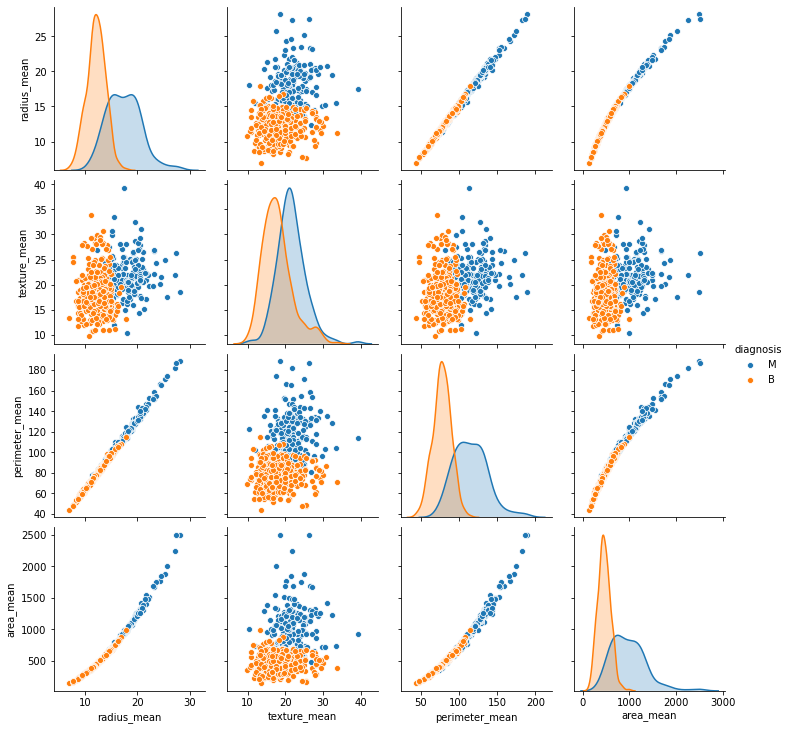

In [7]:
sns.pairplot(df.loc[:,'diagnosis':'area_mean'], hue="diagnosis");

Видим, что целевой параметр в выборке распределён неравномерно

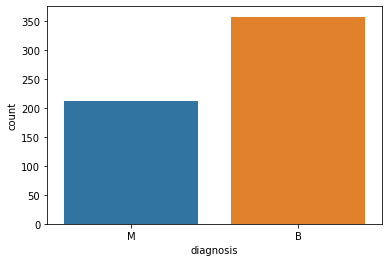

In [8]:
sns.countplot(df["diagnosis"]);

In [9]:
Y = df['diagnosis'].map({'M': 1, 'B': 0})
X = df.drop(['diagnosis', 'id'], axis=1)

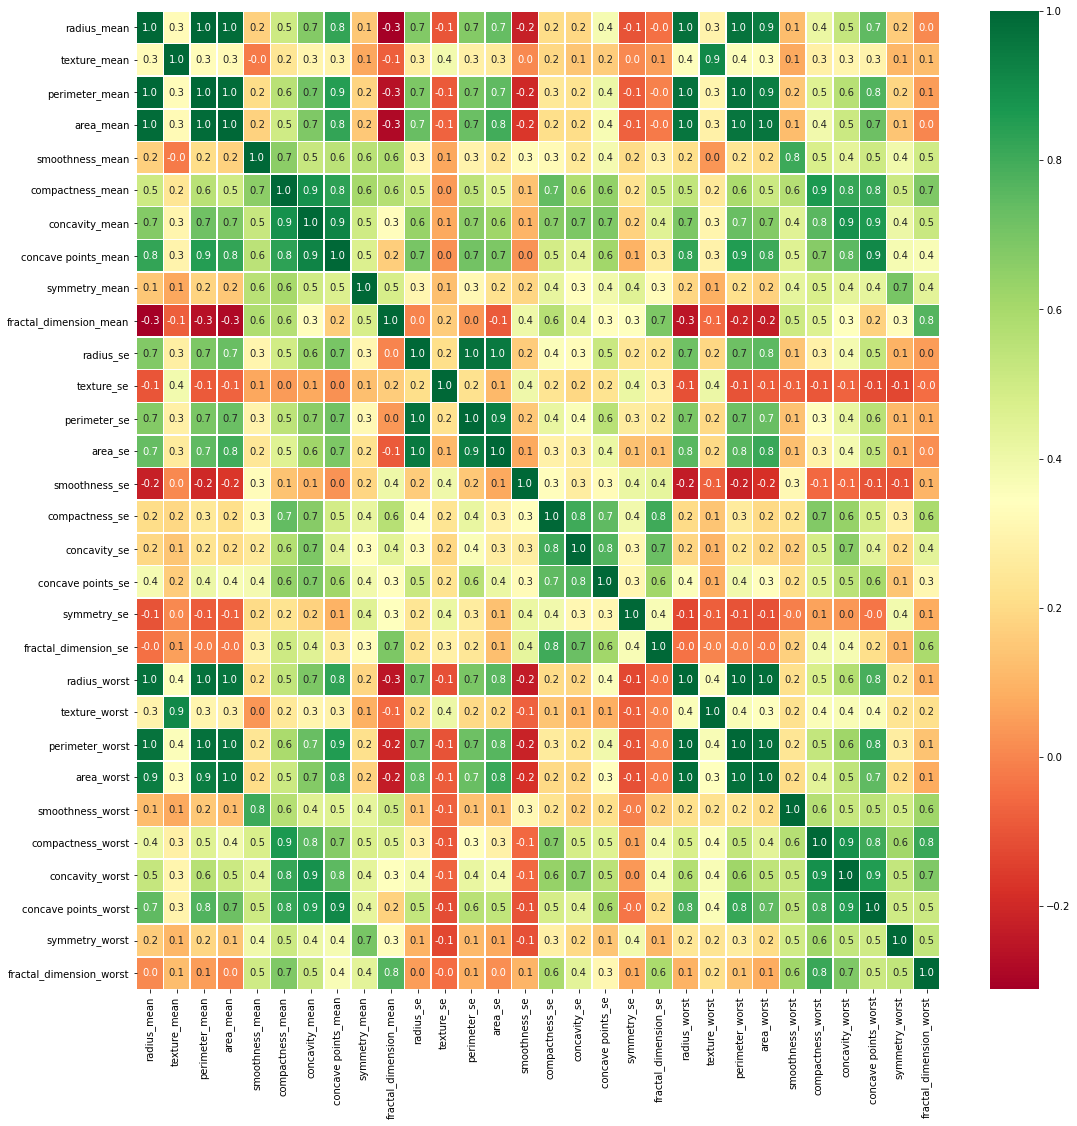

In [10]:
#correlation map
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(X.corr(), annot=True, cmap="RdYlGn", linewidths=.5, fmt= '.1f',ax=ax);

Видим, что radius_mean и perimeter_mean имеют идеальную корреляцию, и это не удивительно, т.к. с помощью радиуса вычисляется периметр. Найдём и уберём некоторые избыточные параметры.

In [11]:
X = X.drop(["radius_mean", "perimeter_mean", "area_mean", "radius_se"], axis=1)

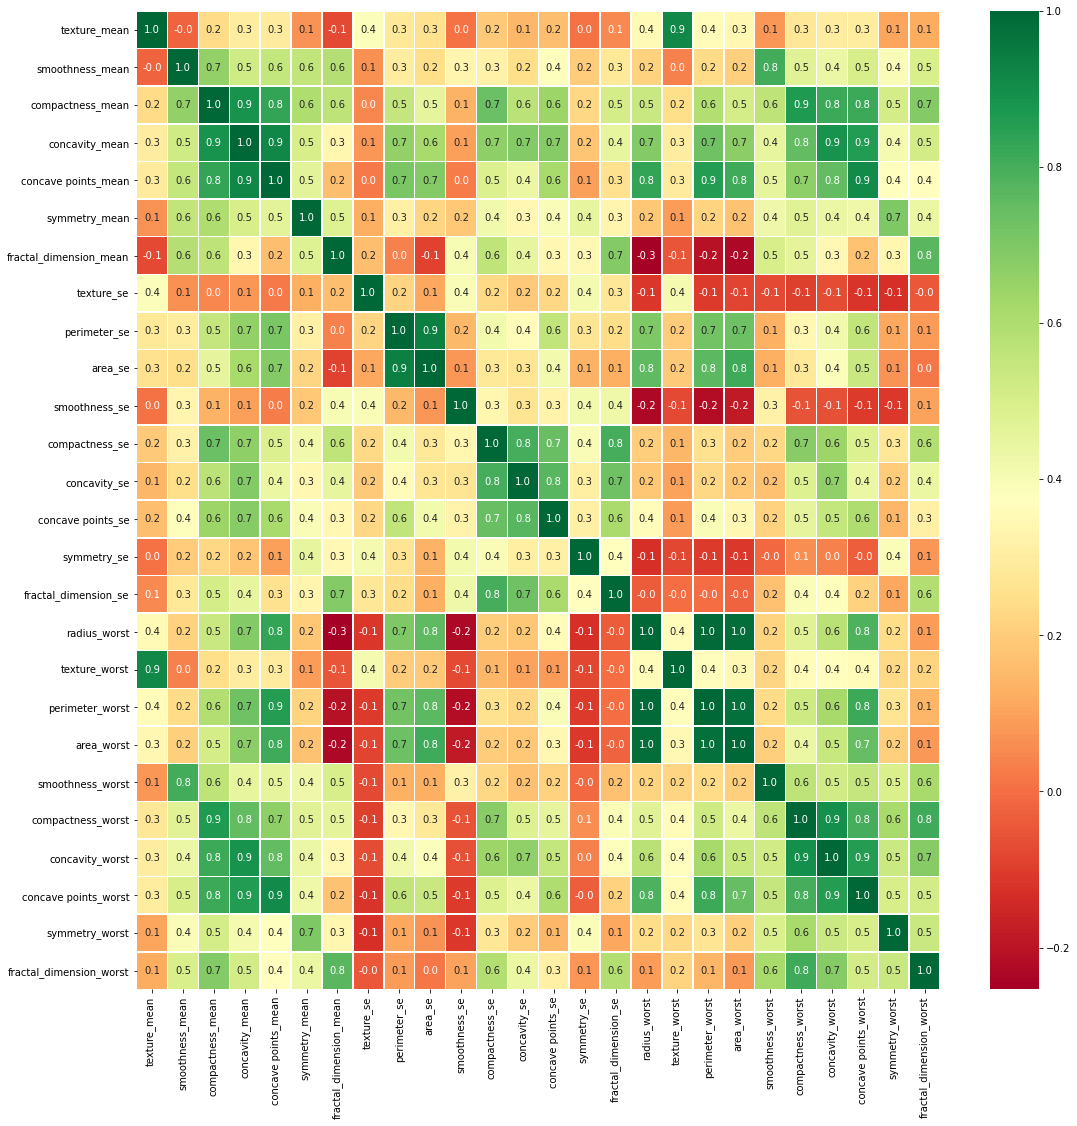

In [12]:
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(X.corr(), annot=True, cmap="RdYlGn", linewidths=.5, fmt= '.1f',ax=ax);

Выделим 80% выборки (X_train, y_train) под обучение и 20% будут отложенной выборкой (X_test, y_test). отложенная выборка никак не будет участвовать в настройке параметров моделей, на ней мы в конце, после этой настройки, оценим качество полученной модели.

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=7)

Создаем и обучаем классификатор:
Основные параметры класса sklearn.neighbors.KNeighborsClassifier:


* weights: "uniform" (все веса равны), "distance" (вес обратно пропорционален расстоянию до тестового примера) или другая определенная пользователем функция 

* algorithm (опционально): "brute", "ball_tree", "KD_tree", или "auto". В первом случае ближайшие соседи для каждого тестового примера считаются перебором обучающей выборки. Во втором и третьем — расстояние между примерами хранятся в дереве, что ускоряет нахождение ближайших соседей. В случае указания параметра "auto" подходящий способ нахождения соседей будет выбран автоматически на основе обучающей выборки.

* leaf_size (опционально): порог переключения на полный перебор в случае выбора BallTree или KDTree для 
нахождения соседей

* metric: "minkowski", "manhattan", "euclidean", "chebyshev" и другие

## kNN

In [14]:
knn_model = KNeighborsClassifier(
   n_neighbors=10, 
   weights='distance',
   algorithm='auto',
   leaf_size=30,
   metric='euclidean',
   metric_params=None,
   n_jobs=-1
)

In [15]:
knn_model.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_jobs=-1, n_neighbors=10,
                     weights='distance')

In [16]:
knn_pred = knn_model.predict(X_test)
print("Evaluation\t\t\tlabels 'M': 1, 'B': 0: \n\n", metrics.classification_report(y_test, knn_pred))

Evaluation			labels 'M': 1, 'B': 0: 

               precision    recall  f1-score   support

           0       0.89      0.99      0.94        74
           1       0.97      0.78      0.86        40

    accuracy                           0.91       114
   macro avg       0.93      0.88      0.90       114
weighted avg       0.92      0.91      0.91       114



Используем скользящий контроль для поиска лучших параметров (англ. cross validation):

In [17]:
model_params = knn_model.get_params()
tuned_params = {}
for k, v in model_params.items():
    tuned_params[k] = [v]
tuned_params['n_neighbors'] = list(range(1, 30))
clf = GridSearchCV(KNeighborsClassifier(), tuned_params, cv=10, n_jobs=-1)
clf.fit(X_train, y_train)
best_params = clf.best_params_

Оценка классификатора:

In [18]:
knn_model = KNeighborsClassifier(**best_params)
knn_model.fit(X_train, y_train)
prediction1 = knn_model.predict(X_test)

In [19]:
print('Used params:', best_params)
print("\nEvaluation\t\t\tlabels 'M': 1, 'B': 0: \n\n", metrics.classification_report(y_test, prediction1))

Used params: {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'euclidean', 'metric_params': None, 'n_jobs': -1, 'n_neighbors': 27, 'p': 2, 'weights': 'distance'}

Evaluation			labels 'M': 1, 'B': 0: 

               precision    recall  f1-score   support

           0       0.89      0.99      0.94        74
           1       0.97      0.78      0.86        40

    accuracy                           0.91       114
   macro avg       0.93      0.88      0.90       114
weighted avg       0.92      0.91      0.91       114



## Логистическая регрессия как линейный классификатор

In [20]:
model = LogisticRegression()
model.fit(X_train, y_train)
prediction2 = model.predict(X_test)
print("The Logistic Regression is\n\n", metrics.classification_report(prediction2, y_test))

The Logistic Regression is

               precision    recall  f1-score   support

           0       1.00      0.94      0.97        79
           1       0.88      1.00      0.93        35

    accuracy                           0.96       114
   macro avg       0.94      0.97      0.95       114
weighted avg       0.96      0.96      0.96       114



## SVM

In [21]:
X_train, X_test, y_train, y_test
model = svm.SVC(kernel="linear", C=0.1, gamma=0.1)
model.fit(X_train, y_train)
prediction3 = model.predict(X_test)
print("The linear SVM is\n\n", metrics.classification_report(prediction3, y_test))

The linear SVM is

               precision    recall  f1-score   support

           0       1.00      0.95      0.97        78
           1       0.90      1.00      0.95        36

    accuracy                           0.96       114
   macro avg       0.95      0.97      0.96       114
weighted avg       0.97      0.96      0.97       114



## Cross Validation

Мы должны обучить и протестировать наш алгоритм на каждом экземпляре набора данных. Затем мы можем взять среднее значение всех отмеченных погрешностей по набору данных.

Перекрестная проверка K-Fold разделяет набор данных на k-подмножества.

Допустим, мы делим набор данных на (k = 5) частей. Мы оставляем 1 часть для тестирования и обучаем алгоритм по оставшимся 4 частям.

Мы продолжаем процесс, меняя часть данных для тестирования на каждой итерации и обучая алгоритм по другим частям. Затем точность и ошибки усредняются, чтобы получить среднюю точность алгоритма.
Это называется перекрестной проверкой K-Fold.

Алгоритм может недообучаться на некоторых обучающих данных, а иногда переобучаться для другого обучающего набора. Таким образом, с помощью перекрестной проверки мы можем получить обобщенную модель.

In [22]:
kfold = KFold(n_splits=10, random_state=22, shuffle=True)

classifiers = [
    "Linear Svm",
    "Logistic Regression",
    "KNN"
]
models = [
    svm.SVC(kernel="linear"),
    LogisticRegression(),
    KNeighborsClassifier(n_neighbors=9)
]

accuracy = []
for model in models:
    cv_result = cross_val_score(model, X, Y, cv=kfold, scoring="accuracy")
    accuracy.append(cv_result)

means = [cv_res.mean() for cv_res in accuracy]
stds = [cv_res.std() for cv_res in accuracy]

results_table = pd.DataFrame({"CV Mean": means, "Std": stds}, index=classifiers)
results_table.sort_values("CV Mean", ascending=False)

,CV Mean,Std
Linear Svm,0.954229,0.029791
Logistic Regression,0.938409,0.036399
KNN,0.913847,0.041199


## Confusion Matrix

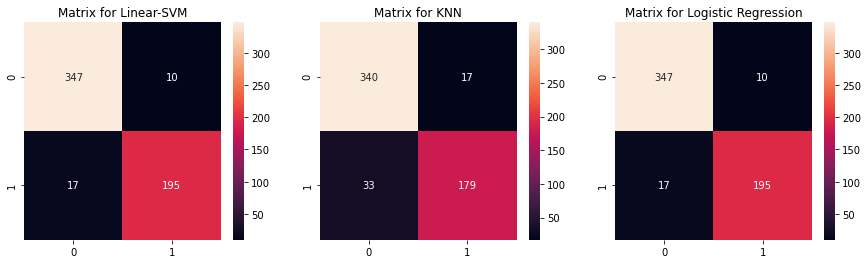

In [23]:
f, ax = plt.subplots(1, 3, figsize=(15, 4))

y_pred = cross_val_predict(svm.SVC(kernel="linear"), X, Y, cv=10)
sns.heatmap(metrics.confusion_matrix(Y, y_pred), ax=ax[0], annot=True, fmt="2.0f")
ax[0].set_title("Matrix for Linear-SVM")

y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=9), X, Y, cv=10)
sns.heatmap(metrics.confusion_matrix(Y, y_pred), ax=ax[1], annot=True, fmt="2.0f")
ax[1].set_title("Matrix for KNN")


y_pred = cross_val_predict(LogisticRegression(), X, Y, cv=10)
sns.heatmap(metrics.confusion_matrix(Y, y_pred), ax=ax[2], annot=True, fmt="2.0f")
ax[2].set_title("Matrix for Logistic Regression");

Главная диагональ показывает количество правильных прогнозов, сделанных для каждого класса, а правая диагональ показывает количество сделанных неверных прогнозов.